# <body>
<h1 style="text-align:center;"> Data Science </h1>
<h4 style="text-align:center;">  Guilherme Araújo  e  Gabriel Novais </h4>
<p  align="justify"> <b> Description </b> : The main goal of our data science work is modelling the variation of the rental prices offered by Airbnb users according to the level of crime in the region. In order to make such work we will need to prepare data then visualize all information with some specific maps and graphs. The last part will be the statistical modelling. Either machine learning and regression techniques will be compared .</p>
    <p><b>Sources and Links:</b></p>

<b>Airbnb</b>
<li><a href="http://insideairbnb.com/get-the-data.html">http://insideairbnb.com/get-the-data.html</a></li>

<b>Chicago</b>
    <li><a>https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6</a></li>
    <li><a>https://data.cityofchicago.org/Public-Safety/Crimes-One-year-prior-to-present/x2n5-8w5q/data</li></a>
    <li><a>https://data.cityofchicago.org/browse?category=Public+Safety</a></li>

<b>New York</b>
<li><a href="https://data.cityofnewyork.us/Public-Safety/Crime-Map-/5jvd-shfj">https://data.cityofnewyork.us/Public-Safety/Crime-Map-/5jvd-shfj</a></li>
<li><a href="https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data">https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data</a></li>
<li><a href="https://data.cityofnewyork.us/browse?category=Public+Safety">https://data.cityofnewyork.us/browse?category=Public+Safety</a></li>
    
</body>

### Packages

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import math
from decimal import Decimal

from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
from ast import literal_eval


### Importing Data

In [8]:
directory = "/home/novais/Desktop/Mestrado/FundamentosDS/Trabalho/dados/Chicago/listings/"
file = directory + 'listings0.csv' #for all do *
#listings = pd.concat([pd.read_csv(f) for f in glob.glob(file)], ignore_index = True)
listings = pd.read_csv(file)
listings = listings[['id','latitude','longitude']]
listings.head()

,id,latitude,longitude
0,2384,41.78886,-87.58671
1,4505,41.85495,-87.69696
2,7126,41.90289,-87.68182
3,9811,41.91769,-87.63788
4,10610,41.79708,-87.59195


In [16]:
directory = "/home/novais/Desktop/Mestrado/FundamentosDS/Trabalho/dados/Chicago/calendar/"
file = directory + 'calendar0.csv' #for all do *
#calendar = pd.concat([pd.read_csv(f) for f in glob.glob(file)], ignore_index = True)
calendar = pd.read_csv(file)
calendar = calendar[['listing_id','date','available','price','adjusted_price']]
calendar = calendar.rename(index=str, columns={"listing_id": "id"})
calendar.head()

,id,date,available,price,adjusted_price
0,507517,2019-07-15,f,$95.00,$95.00
1,2384,2019-07-15,f,$75.00,$60.00
2,2384,2019-07-16,f,$75.00,$60.00
3,2384,2019-07-17,f,$75.00,$60.00
4,2384,2019-07-18,f,$75.00,$60.00


In [20]:
airbnb_chicago = pd.merge(calendar, listings, on='id')
airbnb_chicago.head()

,id,date,available,price,adjusted_price,latitude,longitude
0,507517,2019-07-15,f,$95.00,$95.00,41.96714,-87.69611
1,507517,2019-07-16,f,$95.00,$95.00,41.96714,-87.69611
2,507517,2019-07-17,f,$95.00,$95.00,41.96714,-87.69611
3,507517,2019-07-18,f,$95.00,$95.00,41.96714,-87.69611
4,507517,2019-07-19,f,$105.00,$105.00,41.96714,-87.69611


Start: 2019-07-15
Days: 365 days 
End: 2020-07-13


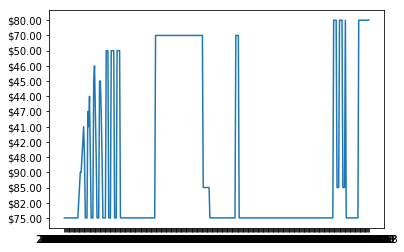

In [33]:
# Filtering only one id:
is_2384 =  airbnb_chicago['id']==2384
airbnb_chicago_2384 = airbnb_chicago[is_2384]
print('Start: '+ str(airbnb_chicago_2384['date'].min()))
print('Days: '+ str(airbnb_chicago_2384.shape[0])+' days ')
print('End: '+ str(airbnb_chicago_2384['date'].max()))
#Visualizing data:
x = airbnb_chicago_2384['date']
y = airbnb_chicago_2384['price']
plt.plot(x,y)
plt.show()

In [50]:
#How many unique hosts are there in our database:
chicago_hosts = airbnb_chicago.groupby(['id']).mean()
chicago_hosts = chicago_hosts.reset_index()
chicago_hosts['Location'] = list(zip(chicago_hosts.latitude, chicago_hosts.longitude))
chicago_hosts.head()

,id,latitude,longitude,Location
0,2384,41.78886,-87.58671,"(41.78886000000019, -87.58670999999964)"
1,4505,41.85495,-87.69696,"(41.85495000000035, -87.69696000000042)"
2,7126,41.90289,-87.68182,"(41.90288999999978, -87.68182000000068)"
3,9811,41.91769,-87.63788,"(41.91769000000019, -87.63787999999933)"
4,10610,41.79708,-87.59195,"(41.797080000000186, -87.59195000000088)"


In [60]:
def merc(Coords):
    Coordinates = (Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [61]:
chicago_hosts['coords_x'] = chicago_hosts['Location'].apply(lambda x: merc(x)[0])
chicago_hosts['coords_y'] = chicago_hosts['Location'].apply(lambda x: merc(x)[1])

In [62]:
chicago_hosts.head()

,id,latitude,longitude,Location,coords_x,coords_y
0,2384,41.78886,-87.58671,"(41.78886000000019, -87.58670999999964)",-9.750108e+06,5.129404e+06
1,4505,41.85495,-87.69696,"(41.85495000000035, -87.69696000000042)",-9.762381e+06,5.139276e+06
2,7126,41.90289,-87.68182,"(41.90288999999978, -87.68182000000068)",-9.760696e+06,5.146444e+06
3,9811,41.91769,-87.63788,"(41.91769000000019, -87.63787999999933)",-9.755804e+06,5.148658e+06
4,10610,41.79708,-87.59195,"(41.797080000000186, -87.59195000000088)",-9.750691e+06,5.130631e+06


In [64]:
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x = chicago_hosts['coords_x'],
         y = chicago_hosts['coords_y'])
output_notebook()
show(p)

Loading BokehJS ...